# Importing Libraries

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Importing the CSV file and visualizing it

In [73]:
poke = pd.read_csv("Pokemon.csv")

In [74]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [75]:
poke.shape

(800, 13)

## Spelling mistakes 

In [76]:
poke.Name = poke.Name.str.replace(".*(?=Mega)", "")

In [77]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Missing values 

In [78]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [79]:
poke.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [80]:
## checking type 2 feature for missing values 
poke["Type 2"].isnull().sum()

386

In [81]:
# Replacing NaN values with the same data as in the Type 1 feature 
poke["Type 2"].fillna(poke["Type 1"], inplace = True)

In [82]:
poke["Type 2"].isnull().sum()

0

## Unique values of the attribute Type 1 (Pokemon Type)

In [83]:
poke["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [84]:
poke["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

## Plot for Type 1 feature

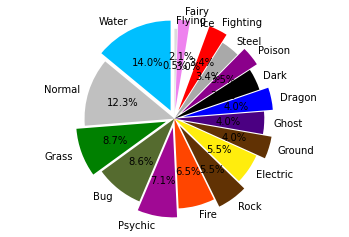

<Figure size 864x576 with 0 Axes>

In [85]:
# pie chart plot for Type 1 (colour coded)
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock', 'Electric', 'Ground', 'Ghost', 'Dragon', 'Dark', 'Poison','Steel', 'Fighting', 'Ice', 'Fairy', 'Flying'    
size = [112, 98, 70, 69, 57, 52, 44, 44, 32, 32, 32, 31, 28 , 27, 27, 24, 17, 4]
explode = (0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0)
colors = ['deepskyblue', 'Silver', 'Green', 'darkolivegreen', '#A00994', 'orangered', '#613204','#FFED0D', '#613204', 'indigo', 'Blue',
          'k', 'darkmagenta', 'darkgray', 'red', 'w', 'violet', 'gainsboro'] 
fig1, ax1 = plt.subplots()
ax1.pie(size, explode = explode, startangle = 90, labels = labels, autopct='%1.1f%%', colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize = [12, 8])
plt.savefig('pokepie.png')
plt.show()

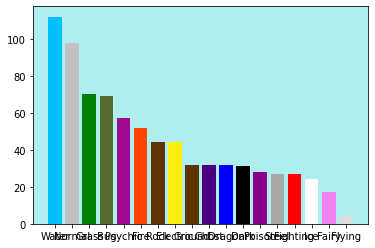

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [86]:
# bar plot for type 1 feature
# The plot will not be able to show the labels and hence its colour coded according to the type of the pokemon
labels = ('Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock', 'Electric', 'Ground', 'Ghost', 'Dragon', 'Dark', 'Poison','Steel', 'Fighting', 'Ice', 'Fairy', 'Flying')    
size = [112, 98, 70, 69, 57, 52, 44, 44, 32, 32, 32, 31, 28 , 27, 27, 24, 17, 4]
colors = ['deepskyblue', 'Silver', 'Green', 'darkolivegreen', '#A00994', 'orangered', '#613204','#FFED0D', '#613204', 'indigo', 'Blue',
          'k', 'darkmagenta', 'darkgray', 'red', 'w', 'violet', 'gainsboro'] 
fig1, ax1 = plt.subplots()
ax1.bar(labels, height = size, color = colors)
ax1.set_facecolor('paleturquoise')
plt.figure(figsize = [12, 8])
plt.show()
plt.savefig('pokebar.png')

## Plot for Legendary Pokemon

In [87]:
poke["Legendary"].unique()

array([False,  True])

In [88]:
poke["Legendary"].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

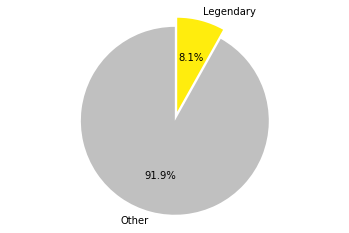

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
# pie chart plot for legendary Pokemon
labels = 'Other', 'Legendary'
size = [735, 65]
explode = (0, 0.1)
colors = ['Silver', '#FFED0D']
fig1, ax1 = plt.subplots()
ax1.pie(size, explode = explode, startangle = 90, labels = labels, autopct='%1.1f%%', colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize = [12, 8])
plt.show()
plt.savefig('legpie.png')

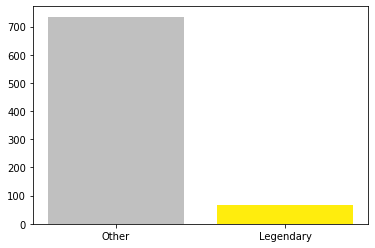

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [90]:
# bar plot for legendary pokemon
labels = 'Other', 'Legendary'
size = [735, 65]
colors = ['Silver', '#FFED0D']
fig1, ax2 = plt.subplots()
ax2.bar(labels, height = size, color = colors)
ax2.set_facecolor('w')
plt.figure(figsize = [12, 8])
plt.show()
plt.savefig('legbar.png')

### Selecting best features

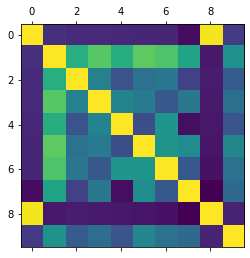

In [91]:
# Correlation Matrix 
plt.matshow(poke.corr())
plt.show
plt.savefig('Corr.png')

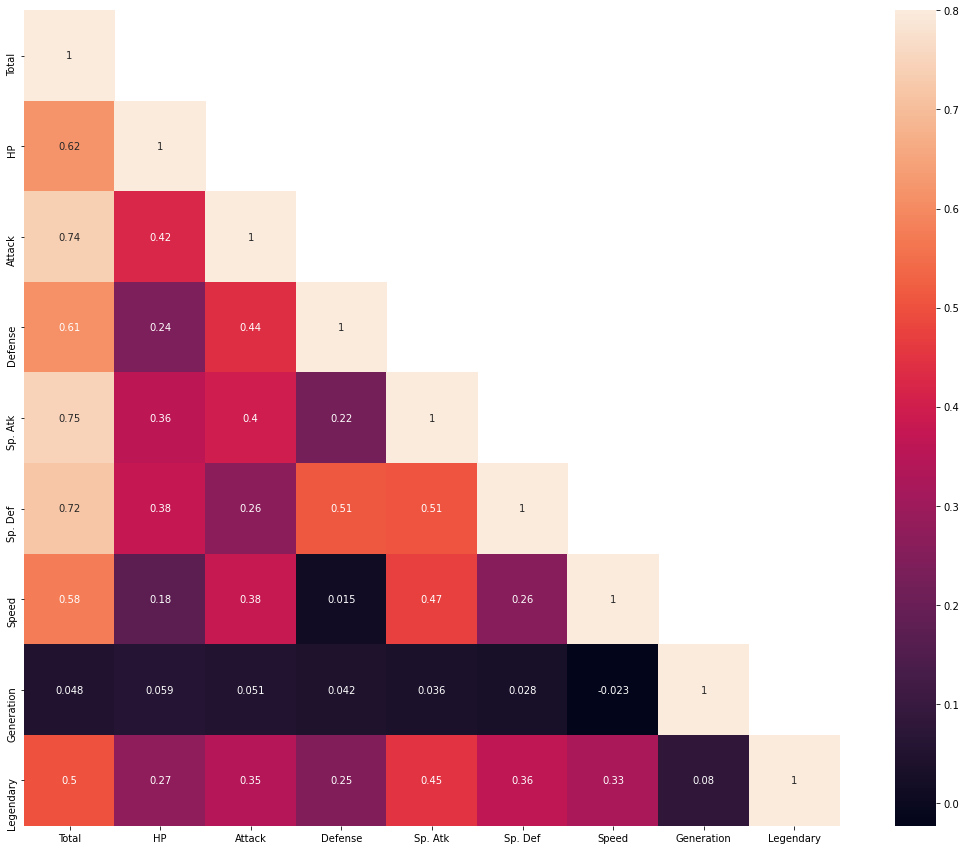

In [92]:
# Correlation Matrix : Heat Map

corr_mat = poke[['Name', 'Type 1','Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
             'Speed', 'Generation','Legendary']].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
#cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_mat, mask = mask, vmax = .8, square = 10, annot = True)
plt.savefig('heatmap.png')

## Check for outliners using boxplots 

In [93]:
# Generation and Legendary features are removed in the copy
poke_cpy = poke.copy()
poke_cpy.drop(['#', 'Total', 'Generation', 'Legendary'], 1, inplace = True)
poke_cpy.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,Fire,39,52,43,60,50,65


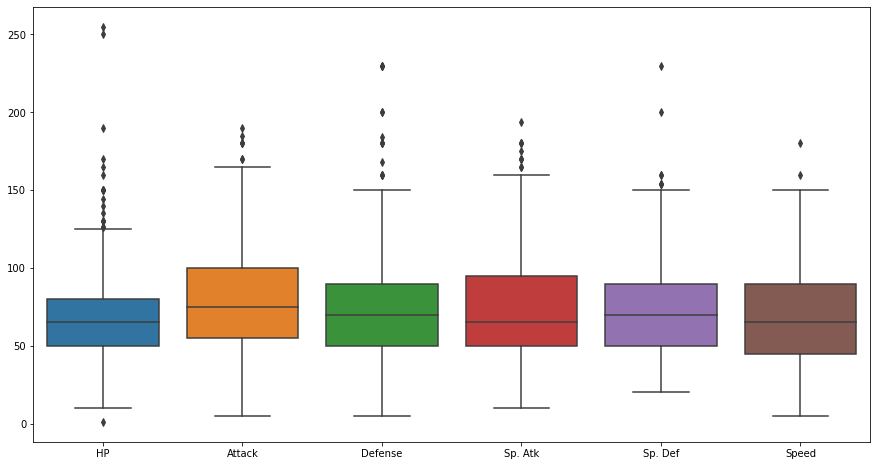

In [94]:
fig = plt.figure(figsize = (15, 8))
sn.boxplot(data = poke_cpy)

## Visualizing different features

In [95]:
# picturing the mean of each feature using the boxplot 
# This can be used for all the features available which helps in knowing the Pokemon in a better way 
def vis_features(type_no, attribute, dataframe):
    a = dataframe.groupby(type_no)[attribute].mean()
    df = pd.DataFrame(a)
    df = df.reset_index()
    df = df.sort_values(by = [attribute])
    fig, axes = plt.subplots(3, 1)
    fig.set_size_inches(25, 15)
    sn.stripplot(data = poke, x = "Type 1", y = "Total", ax = axes[0], jitter = True)
    #plt.savefig(attribute.png)
    sn.boxplot(data = poke, x = "Type 1", y = "Total", orient = "v", ax = axes[1])
    sn.barplot(df[type_no], df[attribute], ax = axes[2])

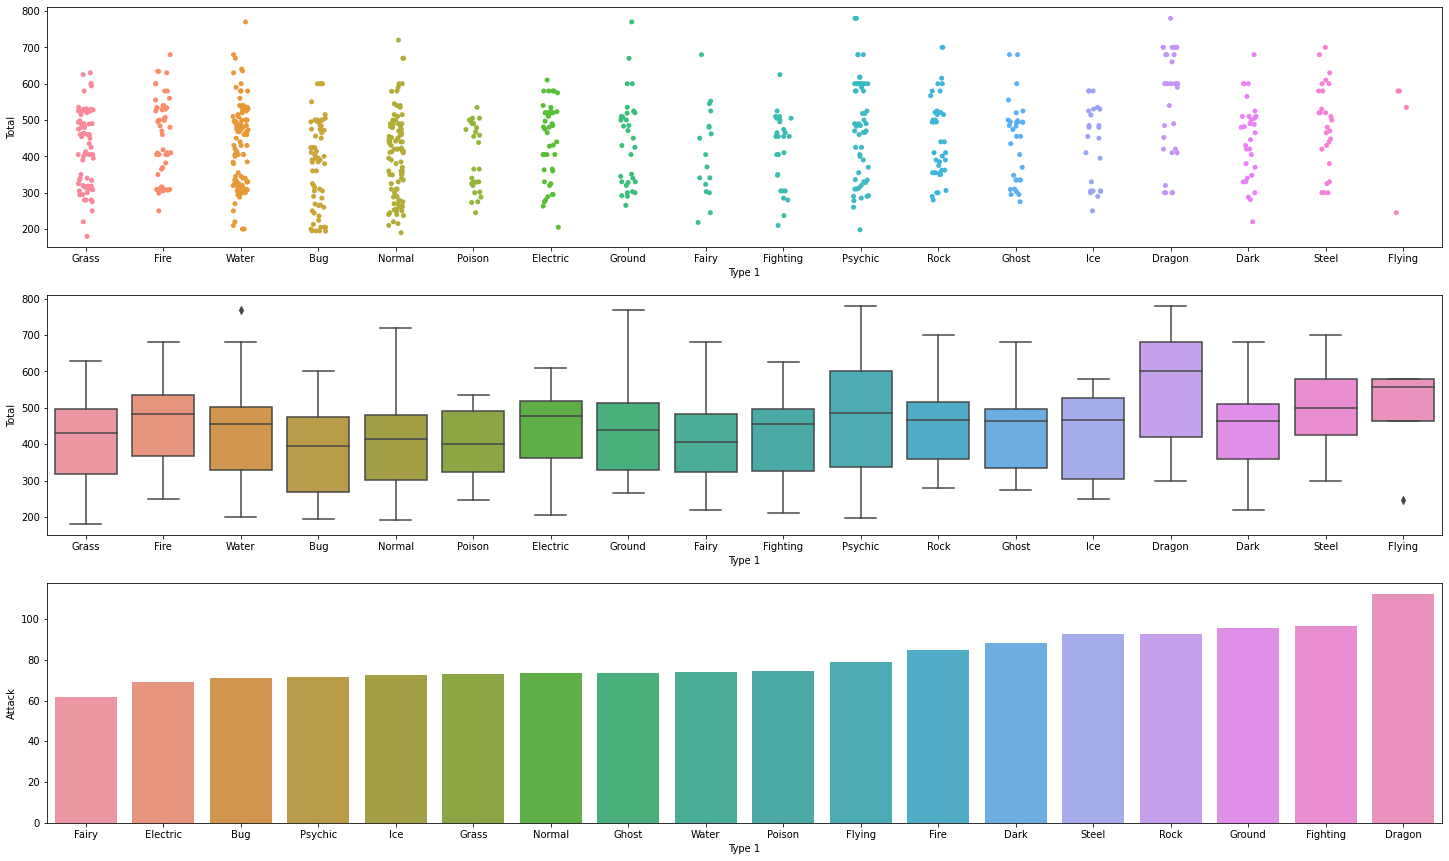

In [96]:
#Attack
vis_features("Type 1", "Attack", poke)

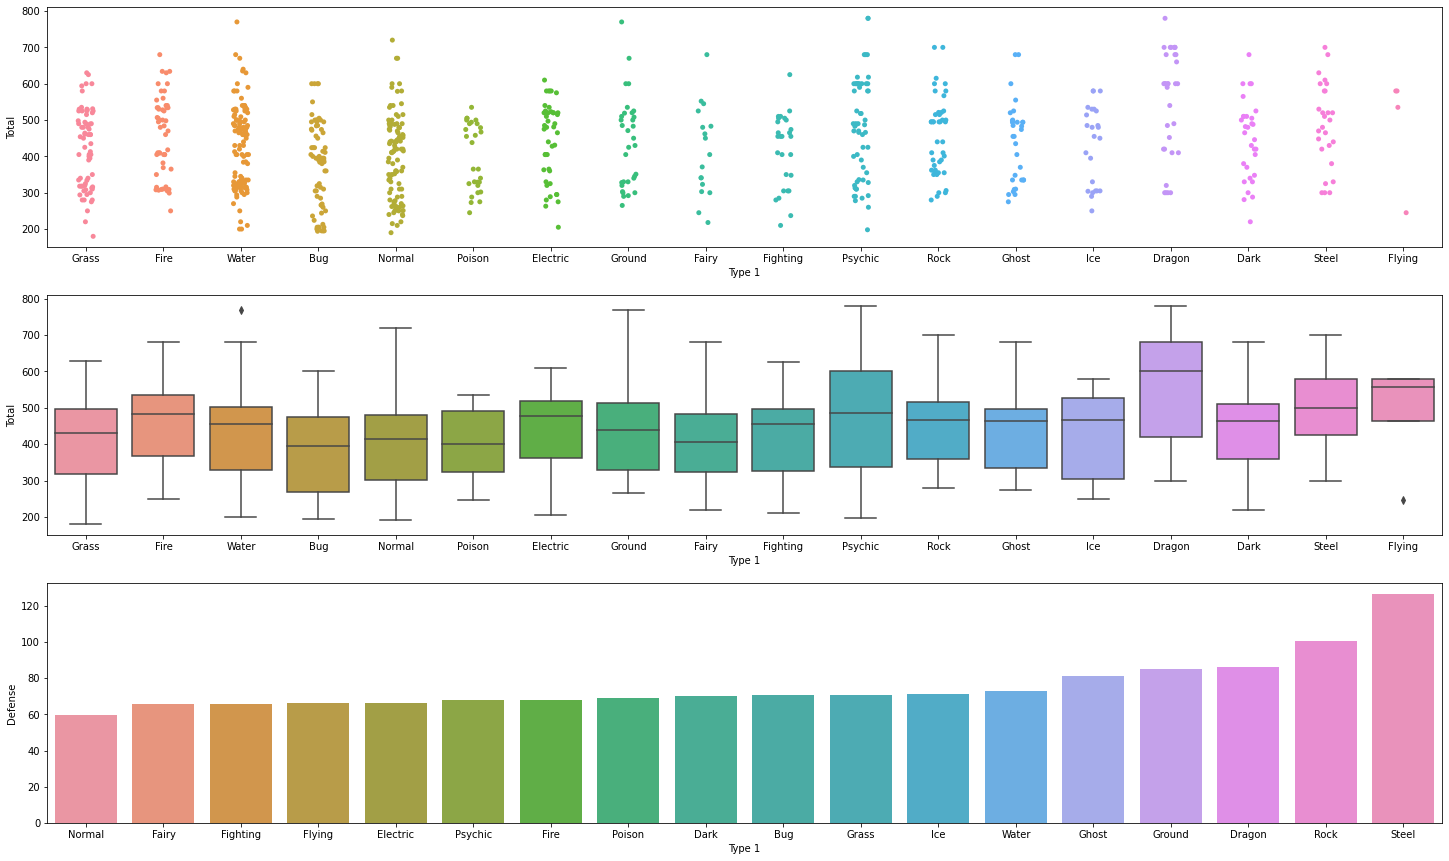

In [97]:
#Defense
vis_features("Type 1", "Defense", poke)

## Swarm Plots to check Generations effect

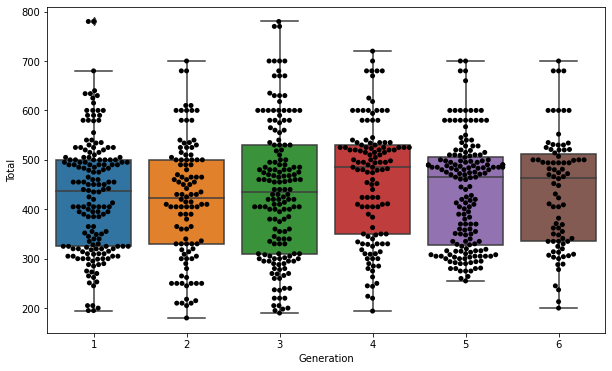

In [103]:
fig = plt.figure(figsize = (10, 6))
sn.boxplot(y = "Total", x = "Generation", data = poke)
ax = sn.swarmplot(x = "Generation", y = "Total", data = poke, color = 'k')
plt.savefig('swarm.png')

## Dependence on Generation

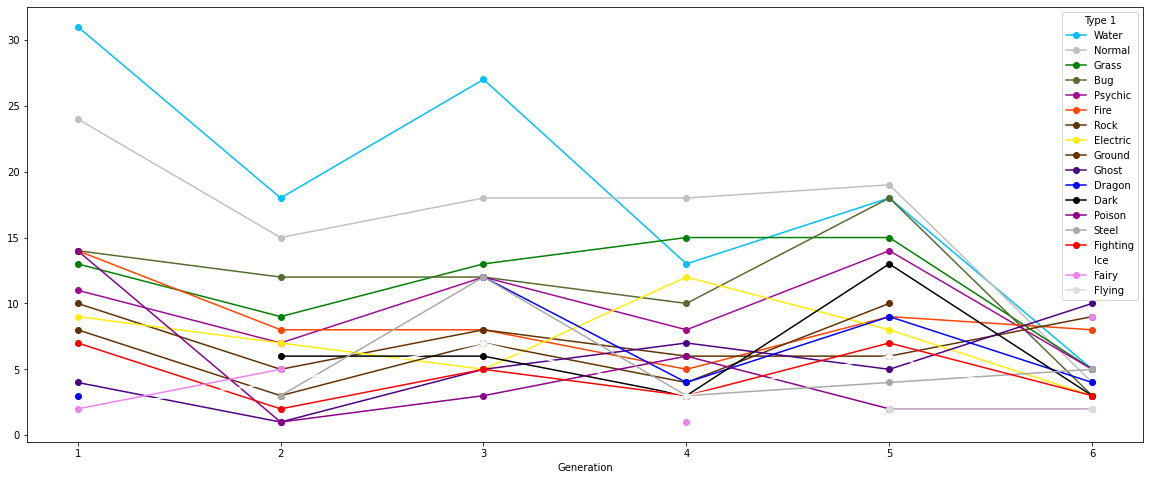

In [109]:
# Type 1
x = poke.groupby(['Generation', 'Type 1']).count().reset_index()
x = x[['Generation', 'Type 1', 'Total']]
x = x.pivot('Generation', 'Type 1', 'Total')
x[['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock', 'Electric', 'Ground', 'Ghost',
   'Dragon', 'Dark', 'Poison','Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']].plot(color = ['deepskyblue', 'Silver', 'Green', 'darkolivegreen', '#A00994', 'orangered', '#613204','#FFED0D', '#613204', 'indigo', 'Blue',
          'k', 'darkmagenta', 'darkgray', 'red', 'w', 'violet', 'gainsboro'], marker = 'o' )
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('DepongenT1.png')
plt.show()

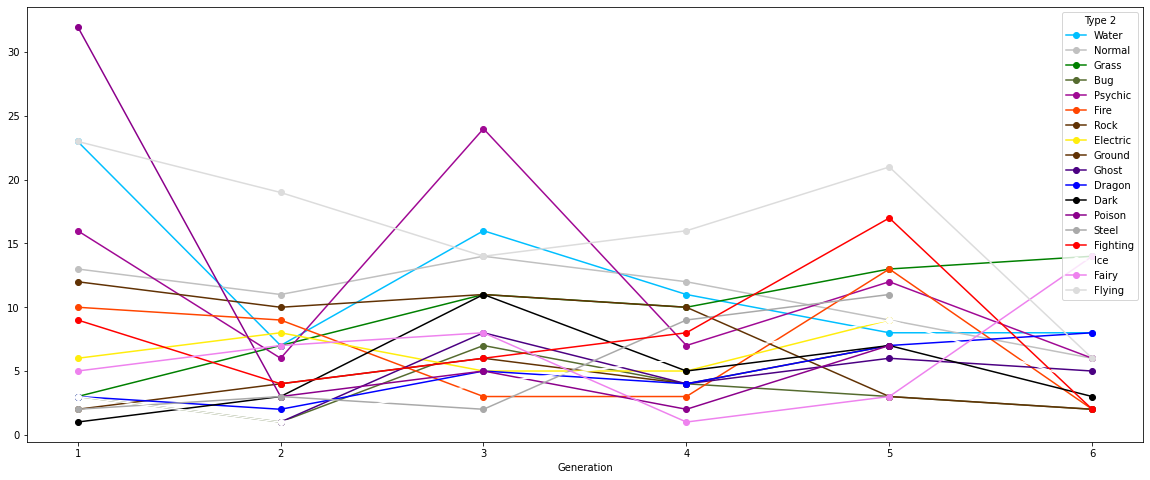

In [110]:
# Type 2
x = poke.groupby(['Generation', 'Type 2']).count().reset_index()
x = x[['Generation', 'Type 2', 'Total']]
x = x.pivot('Generation', 'Type 2', 'Total')
x[['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock', 'Electric', 'Ground', 'Ghost',
   'Dragon', 'Dark', 'Poison','Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']].plot(color = ['deepskyblue', 'Silver', 'Green', 'darkolivegreen', '#A00994', 'orangered', '#613204','#FFED0D', '#613204', 'indigo', 'Blue',
          'k', 'darkmagenta', 'darkgray', 'red', 'w', 'violet', 'gainsboro'], marker = 'o' )
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('DepongenT2.png')
plt.show()

## Visualizing total of legendary and other pokemon compared togerther

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


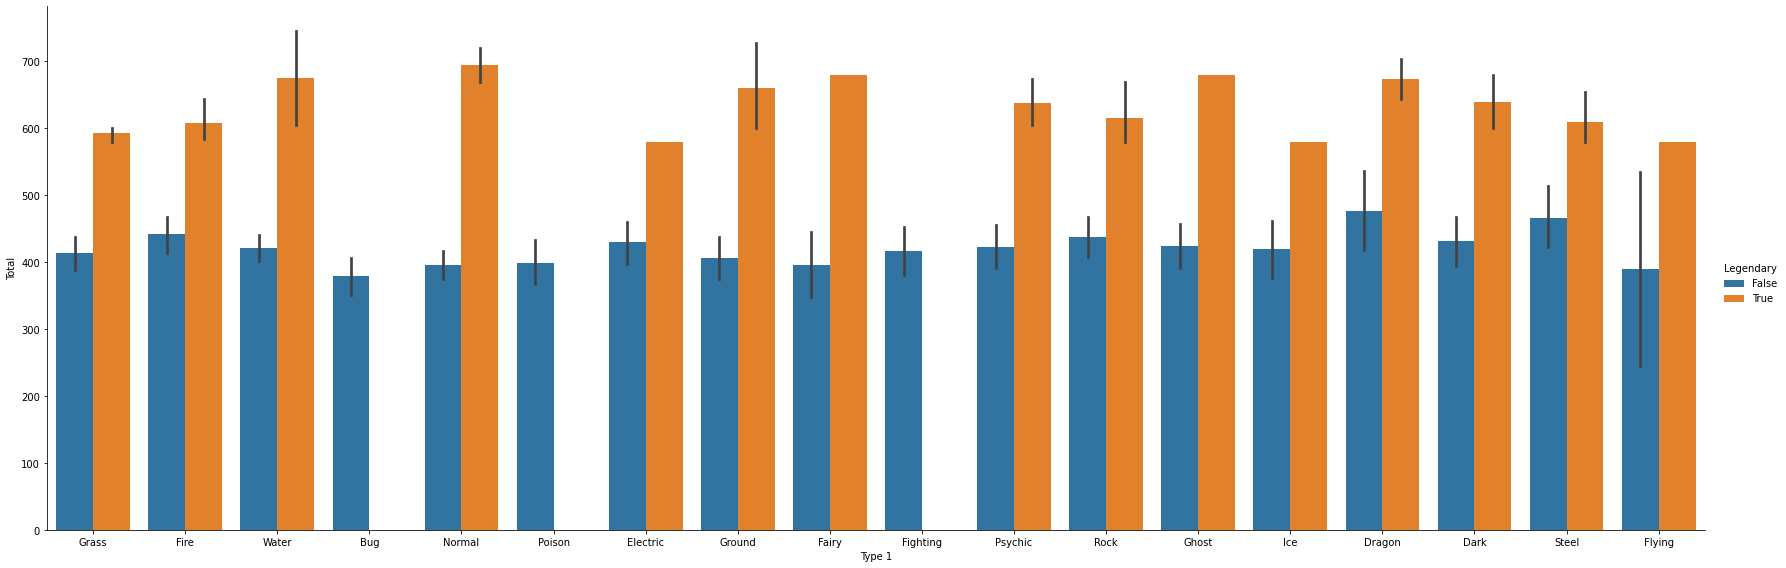

In [112]:
sn.factorplot(x = "Type 1", y = "Total", hue = "Legendary", data = poke, kind = "bar", aspect = 3, size = 8)
plt.savefig('Total.png')